In [6]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
ds = xr.open_dataset("CESM2_200001-201412.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:    (time: 180, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float64 ...
    lon_bnds   (lon, nbnd) float64 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/a7278f6d-6a1b-4050-8f06-a8033604736a
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

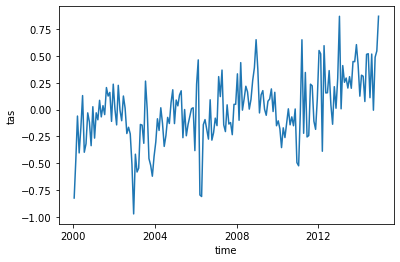

In [13]:
#3.1
ds_tas=ds.groupby('time.month')
anom = ds_tas - ds_tas.mean(dim=['time'])
anom.tas.mean(dim=['lon', 'lat']).plot()

D:\anaconda\lib\site-packages\xarray\plot\plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
D:\anaconda\lib\site-packages\xarray\plot\plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)


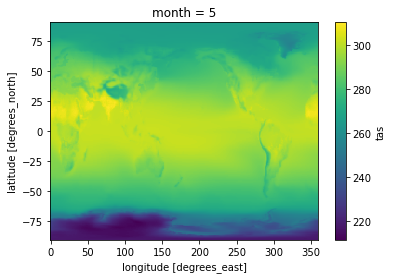

In [15]:
#plot Temperature in the fifth month
ds_tas_tem = ds.tas.groupby('time.month').mean()
ds_tas_tem.sel(month=5).plot()

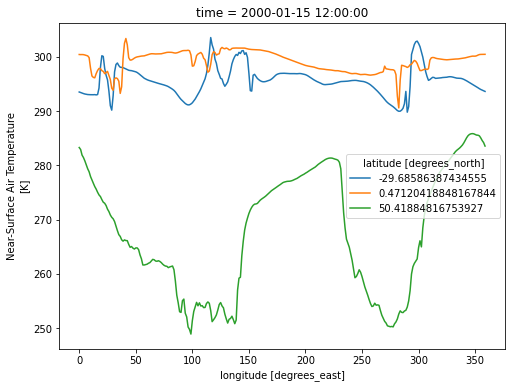

In [16]:
#Time series of the near surface temperature at 3 latitudes
ds.tas.sel(lat=[-30, 0, 50], time="2000-01-15", method="nearest").plot(
    x="lon", hue="lat", figsize=(8, 6)
)

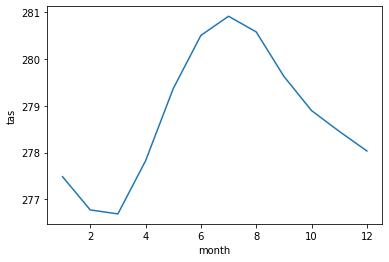

In [18]:
# Plot monthly temperature
ds.tas.groupby('time.month').mean(dim = ['lon', 'lat', 'time']).plot()

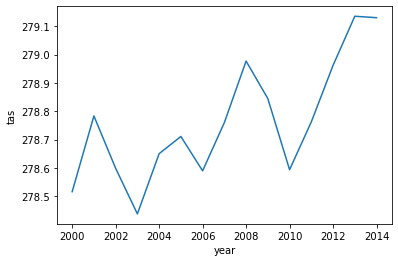

In [23]:
# Plot yearly temperature
ds.tas.groupby('time.year').mean(dim = ['lon', 'lat', 'time']).plot()

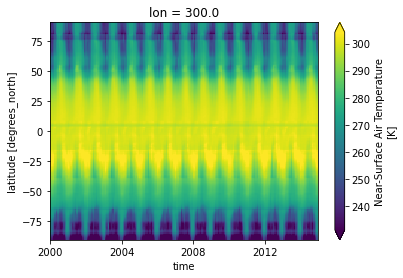

In [26]:
#plot the temperature change at lon=300 
ds.tas.sel(lon=300, method='nearest').plot(
    x="time", 
    robust=True,  
)